# Одновыборочные непараметрические критерии
---

(Shervin, 2004): 16 лабораторных мышей были помещены в двухкомнатные клетки, в одной из комнат висело зеркало. Измерялась доля времени, которое каждая мышь проводила в каждой из своих двух клеток.

Общая постановка:

$H_0$ : мышам всё равно, висит в клетке зеркало или нет. 

$H_1$ : у мышей есть какие-то предпочтения насчёт зеркала.

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns

In [22]:
mouses = pd.Series([0.348471, 0.640620, 0.549818, 0.537454, 0.400444, 
                    0.426292, 0.417156, 0.477977, 0.450657, 0.476602, 
                    0.488677, 0.484741,0.481614, 0.489406, 0.467365],
                        name='time')

In [23]:
mouses.describe()

count    15.000000
mean      0.475820
std       0.068348
min       0.348471
25%       0.438474
50%       0.477977
75%       0.489042
max       0.640620
Name: time, dtype: float64

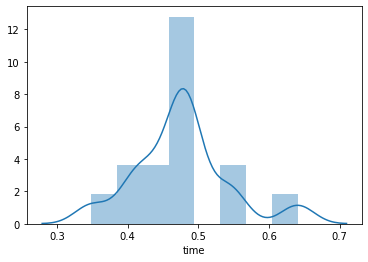

In [24]:
sns.distplot(mouses);

Есть ли у мышей предпочтения?
Найдите среднюю долю времени, которую мыши проводят в комнате с зеркалом. Для этого постройте 95% доверительный интервал с помощью z-теста (воспользуйтесь `zconfint`). Какие выводы можнно сделать основываясь на полученных результатах?

In [25]:
from statsmodels.stats.weightstats import zconfint
zconfint(mouses)

(0.4412313838093066, 0.5104078161906933)

Воспользуйтесь критерием Вилкоксона из библиотеки. 

In [26]:
from scipy.stats import wilcoxon
wilcoxon(mouses - 0.5)

WilcoxonResult(statistic=32.0, pvalue=0.11176874513967605)

### Воспользуйтесь перестановочным тестом.

(1) Сгенерируйте нулевое распределение для перестановочного теста. Для этого вам необходимо центрировать ваши значения и просуммировать их со всевозможными комбинациями знаков {+1, -1}.

- Сгенерируйте выборки со всеми возможными перестановками знаков, полученных при центрировании значений (таких значений у вас получится $2^n$, где $n$ - размер выборки). Вам может помочь функция `itertools.product`
- Центрируйте значения выборки и просуммируйте значения элементов с учетом знаков {+1, -1}

In [38]:
from itertools import product
list(product([-1, 1], repeat=3))

[(-1, -1, -1),
 (-1, -1, 1),
 (-1, 1, -1),
 (-1, 1, 1),
 (1, -1, -1),
 (1, -1, 1),
 (1, 1, -1),
 (1, 1, 1)]

In [39]:
def permutation_zero_distr_1sample(sample, mean):
    signs = product([-1, 1], repeat=sample.shape[0])
    signs = np.array(list(signs))
    mouse_distr = signs.dot(sample - mean) 
    # mouse_distr = (signs*(sample - mean)).sum(axis=1)
    return mouse_distr

Проиллюстрируйте полученное нулевое распределение гипотезы о доле времени мышей в комнатах.

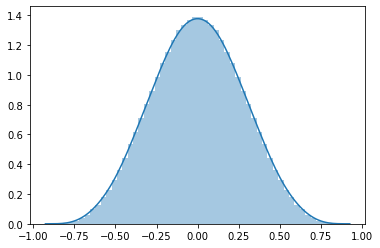

In [28]:
mouse_distr = permutation_zero_distr_1sample(mouses, 0.5)
sns.distplot(mouse_distr)

(2) Посчитайте статистику перестановочного теста. Для этого вам необходимо центрировать ваши значения и просуммировать их.

In [29]:
def permutation_t_stat_1sample(sample, mean):
    t_stat = (sample - mean).sum()
    return t_stat

Чему равно значение статистики в задаче о мышах?

In [30]:
t_stat = permutation_t_stat_1sample(mouses, 0.5)
t_stat

-0.3627060000000001

3) Реализуйте сам тест для двусторонней и односторонних альтернатив. Достигаемый уровень значимости -- доля перестановок знаков, на которых получилось такое же или ещё более экстремальное значение статистики.

In [31]:
def permutation_test(sample, mean, alternative):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not found")
        
    t_stat = permutation_t_stat_1sample(sample, mean)
    zero_distr = permutation_zero_distr_1sample(sample, mean)
    
    if alternative == 'two-sided':
        two_sided_p = (abs(zero_distr) >= abs(t_stat)).mean()
        return two_sided_p
    
    if alternative == 'less':
        left_sided_p = (zero_distr <= t_stat).mean()
        return left_sided_p
    
    if alternative == 'greater':
        right_sided_p = (zero_distr >= t_stat).mean()
        return right_sided_p

Чему равно значение p-value перестановочного теста в задаче о мышах? Можем ли мы отвергнуть нулевую гипотезу?

In [32]:
permutation_test(mouses, 0.5, alternative='two-sided')

0.1949462890625

In [33]:
permutation_test(mouses, 0.5, alternative='less')

0.09747314453125

In [34]:
permutation_test(mouses, 0.5, alternative='greater')

0.902557373046875